## **Predicting Monthly Electricity Price of Residential Sector in the United States**

 Capstone project-2 for Data Science Career Track bootcamp

 Benhur Tedros

## Summary

Today in our world, there are many electric power industries, which cover the generation, transmission, distribution and sale of electric power to the general public and industry. As world’s population, commerce and transportations are expected to grow, the demand for electric power will increase and so does the revenues from the electricity sales. Electricity retailing is the end product of the processes of electric power industry. This industry makes a lot of revenues from electric sales to residential, commercial, and industrial, transportation sectors and others. The other sector refers to activities such as Public Street and highway lighting. The U.S. Energy Information Administration (EIA) collects sales of this electricity and associated revenue, each month, from a statistically chosen sample of electric utilities in the United States. Prediction of future electricity price is helpful in visualizing the overall rates for grid electricity and finding out alternative options. 

The analysis of the electricity price can help the electric power industry and the government in designing new electricity coverage, improving the existing ones and helping their customers better.  State based further prediction would also provide important asset for the pertinent sectors.

## Objective of this project

The goal of this capstone project is to predict the rates of electricity price for U.S residential houses.

## Data

The dataset for this project was published by U.S. Energy Information Administration and was downloaded from their website. 
The dataset is comprised of year, month, year_month, data status, Revenue in thousand dollars, Sales in megawatt hours, and price in cents/kwh for residential sector. The data includes the years from January 1990 to August 2017 and can be downloaded from:

https://www.eia.gov/electricity/data/eia861m/index.html

        

## Methods/Approach

I will treat this project as a time series analysis related problem.  The following libraries will be used for data loading, wrangling, cleaning, data visualization, developing test harness, data analysis, model evaluation etc. 

+ Pandas

+ Numpy

+ Matplotlib

+ Scikit-learn

+ SciPy

+ Statsmodels





## Data Loading and Wrangling 

The data are stored in MS Excel spreadsheet in CSV format, which was easily loaded into pandas dataframes.

In [1]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
from matplotlib import dates
from pandas import TimeGrouper
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import pylab

C:\Users\benbahtin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Setting up the path directory
os.chdir('F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone_Project_2\\Dataset')
os.getcwd()

'F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone_Project_2\\Dataset'

In [3]:
sale_price = pd.read_csv('sales_revenue_monthly.csv')
sale_price.head()

,year,month,year_month,Data Status,Revenue_dollar,Sales_Mwatt,Price_Centkwh
0,1990,1,1/1990,Final,6841300,95420231,7.169654
1,1990,2,2/1990,Final,5571807,74498370,7.479099
2,1990,3,3/1990,Final,5442934,71901767,7.569959
3,1990,4,4/1990,Final,5015134,65190618,7.693030
4,1990,5,5/1990,Final,5006417,62881008,7.961731


In [4]:
# converting to datetime format
sale_price['year_month'] = pd.to_datetime(sale_price['year_month'])
sale_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
year              332 non-null int64
month             332 non-null int64
year_month        332 non-null datetime64[ns]
Data Status       332 non-null object
Revenue_dollar    332 non-null int64
Sales_Mwatt       332 non-null int64
Price_Centkwh     332 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 18.2+ KB


### Exploratory Data Analysis

In [5]:
! pip install ggplot
from ggplot import *

C:\Users\benbahtin\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\benbahtin\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


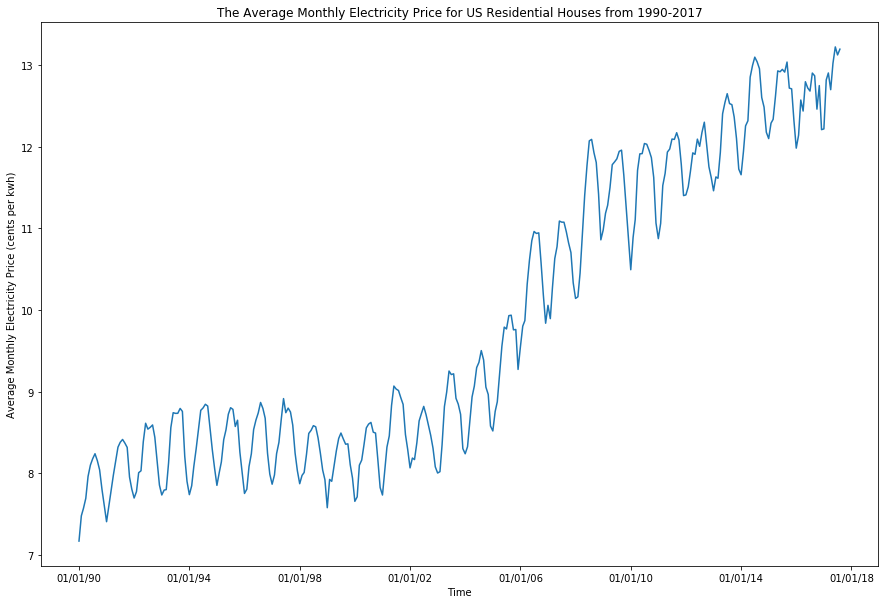

In [6]:
# Let us create dataframe with the time and the revenue dollar 
data_price = pd.DataFrame(sale_price,columns = ['year_month','Price_Centkwh'])
data_price['year_month'] =  pd.to_datetime(data_price['year_month'],format='%Y%m%d', errors='coerce')


# plotting the dataset

fig,ax = plt.subplots(figsize=(15,10))

# Changing the x-axis formatting by creating an object of formatter

date_format = '%d/%m/%y'
formatter_date = dates.DateFormatter(date_format)
ax.xaxis.set_major_formatter(formatter_date)

ax.plot(data_price['year_month'], data_price['Price_Centkwh'])
ax.set_xlabel('Time')
ax.set_ylabel('Average Monthly Electricity Price (cents per kwh)')
ax.set_title('The Average Monthly Electricity Price for US Residential Houses from 1990-2017')

The trend pattern may suggest that there was a seasonality to the electricity price for each year. The use of log transform would be important to deal with the increasing trend in the seasonality.

Let us review the summary statistics of the price of electricity per kwh. This will help us to have a quick overview of the data we are working on.

In [7]:
# Summary statistics of the electricity price
price_stat = data_price.groupby('year_month')['Price_Centkwh'].agg('mean')
price_stat.describe()

count    332.000000
mean       9.833654
std        1.792077
min        7.169654
25%        8.300719
50%        8.916086
75%       11.712423
max       13.219444
Name: Price_Centkwh, dtype: float64

The dataset has 332 number of observations with the mean value of 9.834 cents/kwh with standard deviation of 1.79. The average min and max values were 7.17 and 13.22 cents/kwh respectively. The percetiles shows a fairly distributed data.

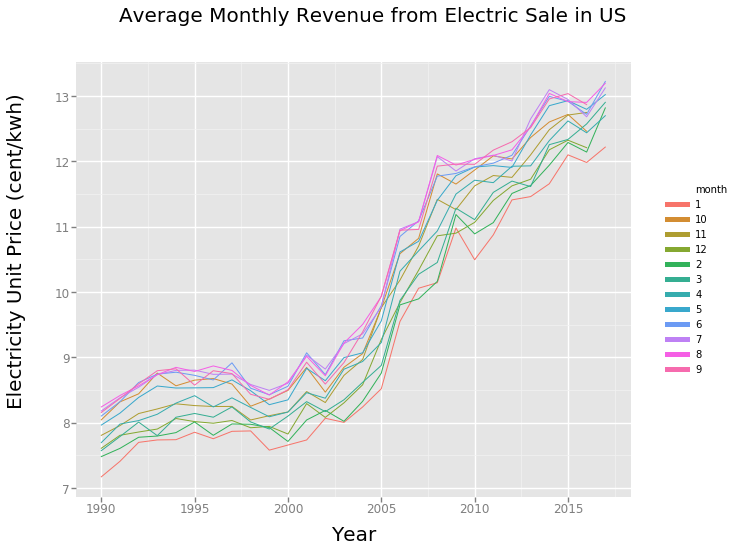

<ggplot: (-9223371973768744374)>

In [8]:
# converting month into series nature for the plotting purposes
sale_price['month'] = sale_price['month'].astype('str')
sale_price_sort = sale_price.sort_values(by='month')

# plotting the monthly revenue across the years
b =ggplot(sale_price_sort,aes('year','Price_Centkwh',color='month')) + ggtitle(element_text(text='Average Monthly Revenue from Electric Sale in US', size=20)) + \
    xlab(element_text(size=20, text='Year',hjust = -0.025)) + ylab(element_text(size=20, text='Electricity Unit Price (cent/kwh)',vjust = 0.30)) + \
    geom_line(colour = 'month')

b

It is also helpful to explore the distribution pattern of the dataset using desity plot. This may help us when setting up statistical hypothesis tests for checking the normality of the dataset observations.

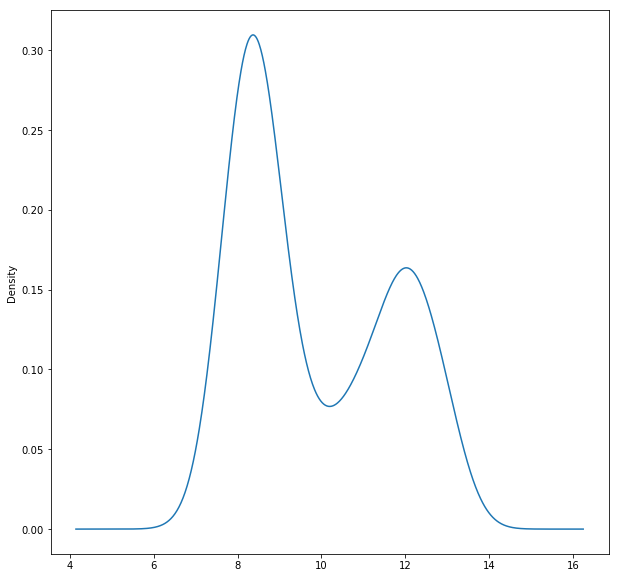

In [9]:
# Density plot for the monthly sale revenue
price_density = pd.Series(data_price['Price_Centkwh'])
fig, ax = plt.subplots(figsize=(10,10))
price_density.plot(kind='kde')

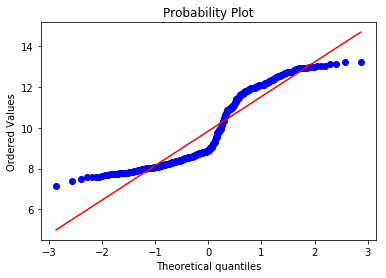

In [15]:
# QQ-plot to test the normal distribution
stats.probplot(data_price['Price_Centkwh'], dist="norm", fit=True, plot=pylab)
pylab.show()

The plot appeared to show a bimodal distribution. This may suggest to explore and use some power transforms before proceeding to model fitting.  However,the transformation by log, square root or reciprocal was appeared to be ineffective.

,mean,median,std
month,,,
1,9.206425,8.152348,1.755209
2,9.375988,8.255709,1.798704
3,9.567864,8.482098,1.814061
4,9.789529,8.875615,1.796706
5,10.064005,9.030773,1.827817
6,10.226768,9.272824,1.793287
7,10.262168,9.283071,1.804862
8,10.290070,9.359641,1.809581
9,10.127858,8.923380,1.788625


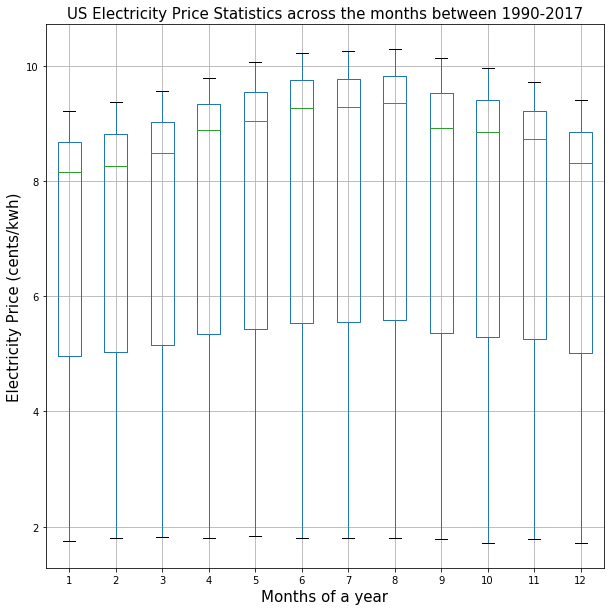

In [17]:
# distribution of the average revenue values across months with a year
price_bx = pd.DataFrame(sale_price.groupby('month')['Price_Centkwh'].agg(['mean','median','std']))
price_bx.index = price_bx.index.astype('int')
price_bx.sort_index(inplace=True)


# Transpose the index to columns
price_bp = price_bx.T

# ploting the the data
fig, ax = plt.subplots(figsize=(10,10))
price_bp.boxplot()

ax.set_xlabel('Months of a year',fontsize =15)
ax.set_ylabel('Electricity Price (cents/kwh)',fontsize =15)
ax.set_title('US Electricity Price Statistics across the months between 1990-2017',fontsize =15)
# revenue_bx=revenue_bx.reset_index()
# revenue_bx['month'] = revenue_bx['month'].astype('int')
# revenue_bx.sort_values(by='month', axis=0, ascending=True)
price_bx

The median values of each month showed some trend. It increased from January to August and decreased

The above figure shows the trend of the average revenue value of each month across the years 1990-2017. The monthly revenue from electric sale increased with time. The trend from 1990 to 2005 is appeared to be gradual, while it showed a sharp increase towards 2008. The increasing trend continued gradually until 2012 where it displayed a sharp drop. However, it picked up again towards 2015. Beyond 2015, it looks the trend decreased again. Though, there was some monthly revenue fluctuations( small increase or decrease) through out the years, the average revenue was appeared to display a general increasing trend. Further, the revenue was higher in the months of July and August followed by January, June and September. April was the one with low revenue. The weather conditions could be one of the factors that happen to manipulate the difference in the monthly revenue, however further research should be done to have a concrete conclusion.

### Checking the Stationarity, Trend and Seasonality in the dataset

When we visualize our time series dataset, it is recommended to look out for few things. The main areas that should be observe are the seasonality, trend and noise in the dataset. Are we seeing any clearn periodic pattern in the data; does the data show a consistent trend either upward or downward; is the data have any outlier points which are not consistent with the rest of the data. 
Based on the above plots, it is clear evident that there is an overall increasing trend with some monthly/seasonal variations. Let us do formal analysis on the stationarity of the dataset.

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


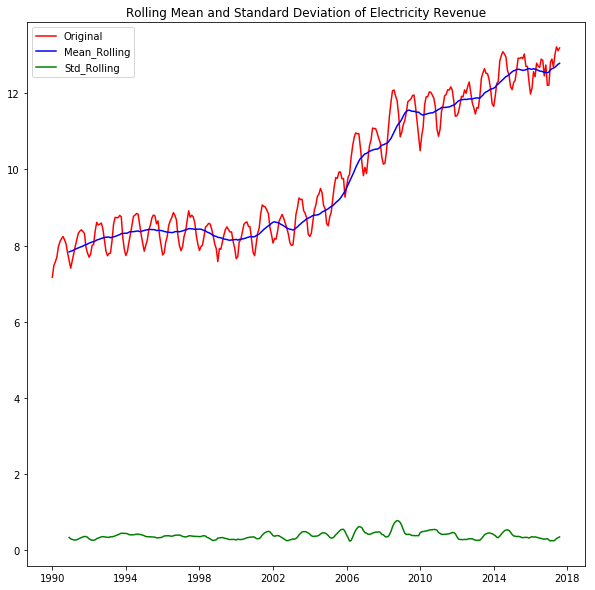

In [18]:
# Setting the dataframe index
data_price_final = data_price.set_index('year_month')
    
# Let us check the stationarity using rolling statistics 

rollmean_price = pd.rolling_mean(data_price_final, window = 12)
rollstd_price = pd.rolling_std(data_price_final, window = 12)

# Plotting the statistics results
fig,ax = plt.subplots(figsize=(10,10))

ax.plot(data_price_final, color='red',label='Original')
ax.plot(rollmean_price, color='blue',label='Mean_Rolling')
ax.plot(rollstd_price, color='green',label='Std_Rolling')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation of Electricity Revenue')

The plot shows that the mean of this time series data does not look constant and stationary, though the standard deviation variation looks small.

In [19]:
# Applying to Dickey-Fuller test results to check stationarity
stat_test = adfuller(data_price_final['Price_Centkwh'], autolag = 'BIC')
Output = pd.Series(stat_test[0:4], index = ['Test Statistic','p-value','number of Lags use','Number of observations used'])
print(Output)
print('Critical value at:')

for key,value in stat_test[4].items():
    print (key,value)


Test Statistic                   0.482779
p-value                          0.984340
number of Lags use              12.000000
Number of observations used    319.000000
dtype: float64
Critical value at:
1% -3.45101677515
5% -2.87064334231
10% -2.57162017443


As it can be observed in the statistics summary, the test statistics is greater than the critical value at 1% or 5% and the p-value is appeared to be greater than 0.05 threshold. These results imply that it is much less likely to reject the null hypothesis and the time series is non-stationary.

## Model Fitting

### Separating validation dataset

The electricity price values from the last 8 months were kept for validating purposes.

In [62]:
# Splitting validation dataset
# data_price= data_price.set_index('year_month')
split = len(data_price)-8
data, validate_set = data_price[0:split],data_price[split:]
print('data = %d, validate_set = %d' % (len(data),len(validate_set)))

# Copying the validating dataset for later use
validate_index = validate_set.copy()
validate_index = validate_index.set_index('year_month')

data = 324, validate_set = 8


,Price_Centkwh
year_month,
2017-01-01,12.215826
2017-02-01,12.815153
2017-03-01,12.900470
2017-04-01,12.695713
2017-05-01,13.018536
2017-06-01,13.219444
2017-07-01,13.121188
2017-08-01,13.191809


### Deseasonlized the time series

To get rid off the effect of seasonality variation in the dataset, we have to take the difference of the electricity price values for equivalent months throughout the given years.

In [23]:
# Differencing the electricity price values
def ts_difference(df,inter=1):
    diff = list()
    for d in range(inter,len(df)):
        x = float(df.values[d] - df.values[d-inter])
        diff.append(x)
    return pd.Series(diff)

data111 = data_price.set_index('year_month')

numMonth = 12
stat_data = ts_difference(data111,numMonth)
stat_data.index = data111.index[numMonth:]


# The above process can also be done easily by utilizing the shift() function:
ans = (data111-data111.shift(12)).dropna(axis=0, how='any')

We have now a seasonality differenced dataset, and the next step is to make sure this new evaluated dataset is stationary.

In [24]:
# Inverting the seasonality differenced values
def diff_invert(histData,y_pred,inter=1):
    return y_pred + histData[-inter]

Test Statistic                  -2.902593
p-value                          0.045047
number of Lags use              15.000000
Number of observations used    304.000000
dtype: float64
Critical value at:
1% -3.45204531783
5% -2.87109480556
10% -2.57186092149


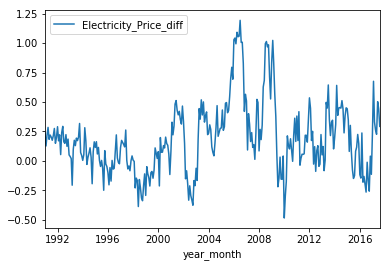

In [25]:
# Check stationarity
stat_test = adfuller(stat_data, autolag = 'AIC')
Output = pd.Series(stat_test[0:4], index = ['Test Statistic','p-value','number of Lags use','Number of observations used'])
print(Output)
print('Critical value at:')

for key,value in stat_test[4].items():
    print (key,value)
    
# Converting into date format
x = (pd.DataFrame(stat_data,columns=['Electricity_Price_diff'])).reset_index()
x['year_month'] = (pd.to_datetime(x['year_month'])).apply(lambda x: x.date())
elec = x.set_index('year_month')

# Plotting the seasonal differenced electricity price
elec['Electricity_Price_diff'] = elec['Electricity_Price_diff'].astype('float')
elec.plot()

The above result shows that the test statistic value of -2.903 is lower than the crtical value at 5% of -2.8712. Also, the p-value of 0.045 shows a lower value than the threshold of 0.05. This explains that we can reject the null hypothesis with a significance level at 5%. The time series is now  stationary and does not have time-dependent structure. The plot also displays no seasonality or trend variations.

### ARIMA Models

These models have three parameters (p,d,q), which are needed to be configured. It is necessary to figure out the parameters, p and q, for the AR and MA models respectively. This can be done by plotting ACF and PACF  functions. The d value refers to the number of nonseasonal difference. In this case, d is appeared to be zerovas the test statistics shows that there is no need for further differencing.

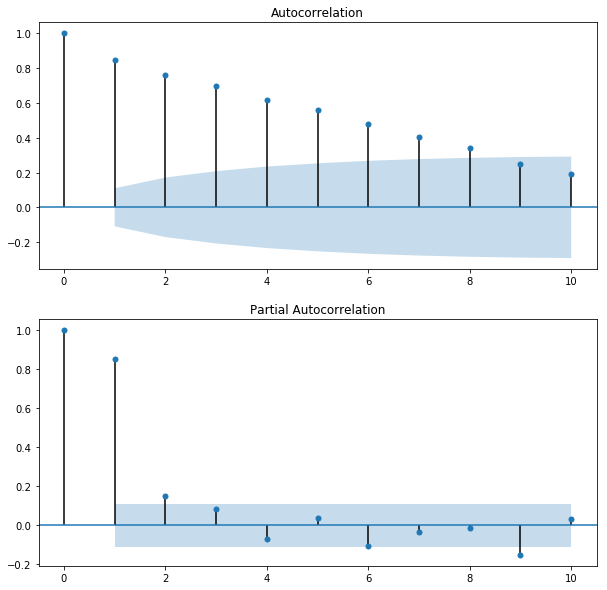

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10,10))
plt.subplot(211)
plot_acf(stat_data, ax=plt.gca(),lags=10)
plt.subplot(212)
plot_pacf(stat_data, ax=plt.gca(),lags=10)
plt.show()

The plot crosses the upper confidence interval for the first time at lag value of 1 for the ACF plot, and this value refers to q value. For the second PACF plot, the cross was appeared at a value of 1, which is p-value. Therefore, (1,0,0), (0,0,1) and (1,0,1) orders should be used for AR, MR and ARIMA models respectively.

#### Training and Testing dataset

Before building the models, it is necessary to split the dataset (data) into training and testing dataset for model fitting and evaluation purposes.

In [27]:
# Training and testing dataset
data.year_month = data.year_month.values.astype('float32')
dataYear = data.set_index('year_month')
price_data = pd.Series(dataYear['Price_Centkwh'].values)
train_bound = int(len(price_data)* 0.50)
train,test = price_data[0:train_bound],price_data[train_bound:]
print('training dataset = %d, testing dataset = %d' % (len(train),len(test)))

training dataset = 162, testing dataset = 162


C:\Users\benbahtin\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### 1) AR Model

In [28]:
# Creating the differencing function
def diff_data(df,inter=1):
    diffaa = list()
    for d in range(inter,len(df)):
        y = float(df[d] - df[d-inter])
        diffaa.append(y)
    return diffaa

# Inverting the differenced values
def diff_invert(histData,y_pred,inter=1):
    return y_pred + histData[-inter]

# Evaluating the candidate models Using walk-forward testing
hist_data = [h for h in train]
ss = pd.Series(hist_data)
pred= list()
for j in range(len(test)):
    numMonth = 12  
    dd = diff_data(ss,numMonth)
    # Prediction
    model = ARIMA(dd,order = (1,0,0))
    fit_model = model.fit(trend='nc',disp=0) # no need to include the constant and print the convergence information    
    y_pred = fit_model.forecast()[0]
    # inverting the forecasted data              
    y_pred_invert = diff_invert(hist_data, y_pred,numMonth)   
    pred.append(y_pred_invert)  
    # original observed data
    observed = test.values[j]
    hist_data.append(observed)
#     print('Predicted =%0.4f, Observed=%0.4f' % (y_pred_invert,observed))
# Estimating the RMSE
rmse = np.sqrt(mean_squared_error(test,pred))
print('RMSE=%0.4f' % rmse)

RMSE=0.3540


#### 2) MR Model

In [29]:
# Evaluating the candidate models Using walk-forward testing
hist_data2 = [h for h in train]
ss2 = pd.Series(hist_data2)
pred2= list()
for j in range(len(test)):
    dd2 = diff_data(ss2,numMonth)
    # Prediction
    model2 = ARIMA(dd2,order = (0,0,1))
    fit_model2 = model2.fit(trend='nc',disp=0) # no need to include the constant and print the convergence information    
    y_pred2 = fit_model2.forecast()[0]
    # inverting the forecasted data              
    y_pred_invert2 = diff_invert(hist_data2, y_pred2,numMonth)   
    pred2.append(y_pred_invert2)  
    # original observed data
    observed2 = test.values[j]
    hist_data2.append(observed2)
#     print('Predicted =%0.4f, Observed=%0.4f' % (y_pred_invert2,observed2))
    
# Estimating the RMSE
rmse2 = np.sqrt(mean_squared_error(test,pred2))
print('RMSE=%0.4f' % rmse2)

RMSE=0.3364


#### 3) ARIMA Model

In [30]:
# Evaluating the candidate models Using walk-forward testing
hist_data3 = [h for h in train]
ss3 = pd.Series(hist_data3)
pred3= list()
for j in range(len(test)):
    dd3 = diff_data(ss3,numMonth)
    # Prediction
    model3 = ARIMA(dd3,order = (1,0,1))
    fit_model3 = model3.fit(trend='nc',disp=0) # no need to include the constant and print the convergence information    
    y_pred3 = fit_model3.forecast()[0]
    # inverting the forecasted data              
    y_pred_invert3 = diff_invert(hist_data3, y_pred3,numMonth)   
    pred3.append(y_pred_invert3)  
    # original observed data
    observed3 = test.values[j]
    hist_data3.append(observed3)
#     print('Predicted =%0.4f, Observed=%0.4f' % (y_pred_invert3,observed3))
    
# Estimating the RMSE
rmse3 = np.sqrt(mean_squared_error(test,pred3))
print('RMSE=%0.4f' % rmse3)

RMSE=0.3519


### Residual Error Review

It is good to review the residual error of the forecast, as its distribution should ideally be gaussian with a zero mean.

In [31]:
res = [test.values[k]-pred2[k] for k in range(len(test))]
pd.DataFrame(res).describe()

,0
count,162.000000
mean,0.042433
std,0.334714
min,-0.740121
25%,-0.177052
50%,-0.012971
75%,0.195673
max,0.939276


We can add the mean residual error in the model to correct the prediction. Let us add the value to the selected model (MR).

In [32]:
# Evaluating the candidate models Using walk-forward testing
hist_data4 = [h for h in train]
ss4 = pd.Series(hist_data4)
pred4= list()
for j in range(len(test)):
    dd4 = diff_data(ss4,numMonth)
    # Prediction
    model4 = ARIMA(dd4,order = (0,0,1))
    fit_model4 = model4.fit(trend='nc',disp=0) # no need to include the constant and print the convergence information    
    y_pred4 = fit_model4.forecast()[0]
    # inverting the forecasted data  
    mean_residError = 0.042433
    y_pred_invert4 = mean_residError + diff_invert(hist_data4, y_pred4,numMonth)   
    pred4.append(y_pred_invert4)  
    # original observed data
    observed4 = test.values[j]
    hist_data4.append(observed4)
#     print('Predicted =%0.4f, Observed=%0.4f' % (y_pred_invert4,observed4))
    
# Estimating the RMSE
rmse4 = np.sqrt(mean_squared_error(test,pred4))
print('RMSE=%0.4f' % rmse4)

RMSE=0.3337


The RMSE shows that the AR, MR and ARIMA models,on average, have an error value of 0.3540, 0.3364 and 0.3519 respectively,from the observed values. All the models seemed to perform well, but we tend to select the MR model as its RMSE resulted in slightly lower value.

## Model Validation

In the above section, we splitted the original dataset into two datasets (data and validate_set) for model validating purposes. The final year data was previously kept in validate_set and will be used to validate the final model. From the above analysis, the MR model performed better and is selected as our final model to be utilized on the validating dataset.

>Predicted=12.277, Expected=12.216
>Predicted=12.436, Expected=12.815
>Predicted=12.866, Expected=12.900
>Predicted=12.731, Expected=12.696
>Predicted=13.090, Expected=13.019
>Predicted=13.014, Expected=13.219
>Predicted=12.976, Expected=13.121
>Predicted=13.196, Expected=13.192
RMSE=0.1653


C:\Users\benbahtin\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


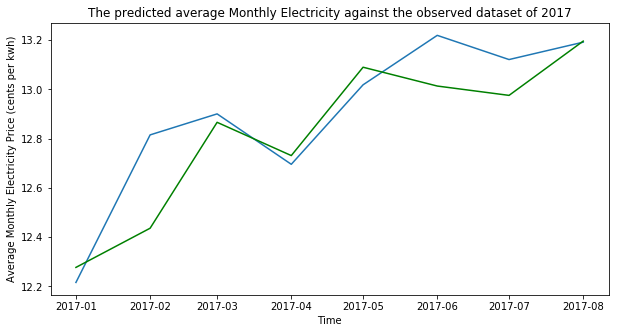

In [80]:
# Preparing the validating dataset
validate_set.year_month = validate_set.year_month.values.astype('float32')
validateYear = validate_set.set_index('year_month')
valPrice = pd.Series(validateYear['Price_Centkwh'].values)

# Preparing the data dataset [historical data except the final year]
data.year_month = data.year_month.values.astype('float32')
dataYear = data.set_index('year_month')
dataPrice = pd.Series(dataYear['Price_Centkwh'].values)

# Prediction in the validating dataset
histFinal = [y for y in dataPrice]
predictions = list()

for p in range(0, len(valPrice)):
    prefinal = float(fit_model4.forecast()[0])
    # inverting the forecasted data 
    invert_pred = mean_residError + diff_invert(histFinal, prefinal,numMonth) 
    predictions.append(invert_pred)
    #Observed data/validating  dataset
    histFinal.append(valPrice[p])
    print('>Predicted=%.3f, Expected=%0.3f' % (invert_pred, valPrice[p]))
    
# Estimating the RMSE
final_rmse = np.sqrt(mean_squared_error(valPrice,predictions))
print('RMSE=%0.4f' % final_rmse) 

# Replacing the index
valPrice.index = validate_index.index
predictions = pd.Series(predictions)
predictions.index = validate_index.index

# Ploting the predicted vs the observed
fig,ax =plt.subplots(figsize=(10,5))

plt.plot(valPrice)
plt.plot(predictions,color='green')

ax.set_xlabel('Time')
ax.set_ylabel('Average Monthly Electricity Price (cents per kwh)')
ax.set_title('The predicted average Monthly Electricity against the observed dataset of 2017')

The above plot shows a better prediction with the predicted values falling close to the observed ones. Based on this forecast in the validating dataset, the final RMSE is predicted to be 0.1653 cents per kwh in a month, which was better than that of training/testing dataset.